### Model Strategy
- Model - 1
    - Upsample true n fraud sets to 3x and XGB Regressor it
    - For all payouts < 0 , make payout = 0
- Model - 2
    - Ensemble 
    - 0/1 prediction by using the upscaled true + train set
    - For 1 Predictions Output payout as mean payout
- Model - 3
    - Ensemble
    - 0/1 predictor from M2
    - For 1 Predictions train Regressor with true data
- Model - 3 variant
    - Cap final output in 0-100
- Look at KNN and SVM for alternate modelling

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from tldextract import extract
from sklearn.metrics import confusion_matrix

import sys
from pathlib import Path
d = Path().resolve().parent.parent
sys.path.insert(0, str(d))
import util.utils as utils
import util.plot_utils as plot_utils

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb



plt.rcParams["figure.figsize"] = (12,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(precision=2)

In [2]:
project_name="click-prediction"

In [3]:
df_conv_status = pd.read_csv("../data/%s/%s" % (project_name,"train-true_8.csv"))
df_fraud= pd.read_csv("../data/%s/%s" % (project_name,"train-fraud_8.csv"))
df = pd.read_hdf("part-1-train.h5","table")

# df = df.sample(frac=1).reset_index(drop=True)
gc.collect()
df_test= pd.read_hdf("test_8.h5","table")
gc.collect()

2347

0

In [4]:

df_frame = df
df_validation = pd.read_hdf("part-7-train.h5","table")

### Marking Nans and unknown values for XGB

In [5]:
nan_rep = np.nan

In [6]:
df_frame.loc[df_frame["Browser"]==0,"Browser"] = nan_rep 
df_conv_status.loc[df_conv_status["Browser"]==0,"Browser"] = nan_rep
df_fraud.loc[df_fraud["Browser"]==0,"Browser"] = nan_rep
df_test.loc[df_test["Browser"]==0,"Browser"] = nan_rep
df_validation.loc[df_validation["Browser"]==0,"Browser"] = nan_rep


In [7]:
df_frame.loc[df_frame["Country"].isin([0,1]),"Country"] = nan_rep
df_conv_status.loc[df_conv_status["Country"].isin([0,1]),"Country"] = nan_rep
df_fraud.loc[df_fraud["Country"].isin([0,1]),"Country"] = nan_rep
df_test.loc[df_test["Country"].isin([0,1]),"Country"] = nan_rep
df_validation.loc[df_validation["Country"].isin([0,1]),"Country"] = nan_rep

In [8]:
df_frame.loc[df_frame["Device"]==0,"Device"] = nan_rep
df_conv_status.loc[df_conv_status["Device"]==0,"Device"] = nan_rep
df_fraud.loc[df_fraud["Device"]==0,"Device"] = nan_rep
df_test.loc[df_test["Device"]==0,"Device"] = nan_rep
df_validation.loc[df_validation["Device"]==0,"Device"] = nan_rep

In [9]:
df_frame.loc[df_frame["publisherId"]==0,"publisherId"] = nan_rep
df_conv_status.loc[df_conv_status["publisherId"]==0,"publisherId"] = nan_rep
df_fraud.loc[df_fraud["publisherId"]==0,"publisherId"] = nan_rep
df_test.loc[df_test["publisherId"]==0,"publisherId"] = nan_rep
df_validation.loc[df_validation["publisherId"]==0,"publisherId"] = nan_rep

In [10]:
df_frame.loc[df_frame["RefererUrl"].isin([0,1,2]),"RefererUrl"] = nan_rep
df_conv_status.loc[df_conv_status["RefererUrl"].isin([0,1,2]),"RefererUrl"] = nan_rep
df_fraud.loc[df_fraud["RefererUrl"].isin([0,1,2]),"RefererUrl"] = nan_rep
df_test.loc[df_test["RefererUrl"].isin([0,1,2]),"RefererUrl"] = nan_rep
df_validation.loc[df_validation["RefererUrl"].isin([0,1,2]),"RefererUrl"] = nan_rep

In [11]:
df_frame.loc[df_frame["sub_domain"].isin([0,1]),"sub_domain"] = nan_rep
df_conv_status.loc[df_conv_status["sub_domain"].isin([0,1]),"sub_domain"] = nan_rep
df_fraud.loc[df_fraud["sub_domain"].isin([0,1]),"sub_domain"] = nan_rep
df_test.loc[df_test["sub_domain"].isin([0,1]),"sub_domain"] = nan_rep
df_validation.loc[df_validation["sub_domain"].isin([0,1]),"sub_domain"] = nan_rep

In [12]:
df_frame.loc[df_frame["url"].isin([0,1,2]),"url"] = nan_rep
df_conv_status.loc[df_conv_status["url"].isin([0,1,2]),"url"] = nan_rep
df_fraud.loc[df_fraud["url"].isin([0,1,2]),"url"] = nan_rep
df_test.loc[df_test["url"].isin([0,1,2]),"url"] = nan_rep
df_validation.loc[df_validation["url"].isin([0,1,2]),"url"] = nan_rep

In [13]:
df_frame.loc[df_frame["city"]==807,"city"] = nan_rep
df_conv_status.loc[df_conv_status["city"]==807,"city"] = nan_rep
df_fraud.loc[df_fraud["city"]==807,"city"] = nan_rep
df_test.loc[df_test["city"]==807,"city"] = nan_rep
df_validation.loc[df_validation["city"]==807,"city"] = nan_rep

In [14]:
df_frame.loc[df_frame["postal_code"]==54143,"postal_code"] = nan_rep
df_conv_status.loc[df_conv_status["postal_code"]==54143,"postal_code"] = nan_rep
df_fraud.loc[df_fraud["postal_code"]==54143,"postal_code"] = nan_rep
df_test.loc[df_test["postal_code"]==54143,"postal_code"] = nan_rep
df_validation.loc[df_validation["postal_code"]==54143,"postal_code"] = nan_rep

In [15]:
df_frame.loc[df_frame["region_code"]==807,"region_code"] = nan_rep
df_conv_status.loc[df_conv_status["region_code"]==807,"region_code"] = nan_rep
df_fraud.loc[df_fraud["region_code"]==807,"region_code"] = nan_rep
df_test.loc[df_test["region_code"]==807,"region_code"] = nan_rep
df_validation.loc[df_validation["region_code"]==807,"region_code"] = nan_rep

In [16]:
df_frame.loc[df_frame["TrafficType"]==0,"TrafficType"] = nan_rep
df_conv_status.loc[df_conv_status["TrafficType"]==0,"TrafficType"] = nan_rep
df_fraud.loc[df_fraud["TrafficType"]==0,"TrafficType"] = nan_rep
df_test.loc[df_test["TrafficType"]==0,"TrafficType"] = nan_rep
df_validation.loc[df_validation["TrafficType"]==0,"TrafficType"] = nan_rep

In [17]:
df_frame.loc[df_frame["subPublisherId"]==0,"subPublisherId"] = nan_rep
df_conv_status.loc[df_conv_status["subPublisherId"]==0,"subPublisherId"] = nan_rep
df_fraud.loc[df_fraud["subPublisherId"]==0,"subPublisherId"] = nan_rep
df_test.loc[df_test["subPublisherId"]==0,"subPublisherId"] = nan_rep
df_validation.loc[df_validation["subPublisherId"]==0,"subPublisherId"] = nan_rep

In [18]:
df_frame.loc[df_frame["OS"]==0,"OS"] = nan_rep
df_conv_status.loc[df_conv_status["OS"]==0,"OS"] = nan_rep
df_fraud.loc[df_fraud["OS"]==0,"OS"] = nan_rep
df_test.loc[df_test["OS"]==0,"OS"] = nan_rep
df_validation.loc[df_validation["OS"]==0,"OS"] = nan_rep

In [19]:
df_frame.loc[df_frame["old_or_new"]==0,"old_or_new"] = nan_rep
df_conv_status.loc[df_conv_status["old_or_new"]==0,"old_or_new"] = nan_rep
df_fraud.loc[df_fraud["old_or_new"]==0,"old_or_new"] = nan_rep
df_test.loc[df_test["old_or_new"]==0,"old_or_new"] = nan_rep
df_validation.loc[df_validation["old_or_new"]==0,"old_or_new"] = nan_rep

In [20]:
df_frame.loc[df_frame["device_type"]==0,"device_type"] = nan_rep
df_conv_status.loc[df_conv_status["device_type"]==0,"device_type"] = nan_rep
df_fraud.loc[df_fraud["device_type"]==0,"device_type"] = nan_rep
df_test.loc[df_test["device_type"]==0,"device_type"] = nan_rep
df_validation.loc[df_validation["device_type"]==0,"device_type"] = nan_rep

In [21]:
df_frame.loc[df_frame["browser_age"]==0,"browser_age"] = nan_rep
df_conv_status.loc[df_conv_status["browser_age"]==0,"browser_age"] = nan_rep
df_fraud.loc[df_fraud["browser_age"]==0,"browser_age"] = nan_rep
df_test.loc[df_test["browser_age"]==0,"browser_age"] = nan_rep
df_validation.loc[df_validation["browser_age"]==0,"browser_age"] = nan_rep

In [22]:
df_frame.loc[df_frame["desktop_browser"]==0,"desktop_browser"] = nan_rep
df_conv_status.loc[df_conv_status["desktop_browser"]==0,"desktop_browser"] = nan_rep
df_fraud.loc[df_fraud["desktop_browser"]==0,"desktop_browser"] = nan_rep
df_test.loc[df_test["desktop_browser"]==0,"desktop_browser"] = nan_rep
df_validation.loc[df_validation["desktop_browser"]==0,"desktop_browser"] = nan_rep

### Features

In [23]:
output_column=["ConversionPayOut"]
categorical_output_column = ["conv_status"]

standard_features=["Carrier","TrafficType","Device","Browser",
          "OS","publisherId","subPublisherId",
          "advertiserCampaignId","Fraud","Country"]

time_features = ["dayofweek","dayofyear","offset_hours","hour"]


ip_features = ["network","subnet","city","region_code","postal_code"]

url_features=["url","sub_domain","RefererUrl"]

browser_os_features = ["device_type","old_or_new","browser_age","desktop_browser"]

unused_features = []

features = standard_features+time_features+ip_features+url_features+browser_os_features
# +time_features+ip_features+url_features+browser_os_features

In [24]:


df_conv_status[output_column]=df_conv_status[output_column].fillna(1)
df_fraud[output_column]=df_fraud[output_column].fillna(0)
df[output_column]=df[output_column].fillna(0)
# df_conv_status=df_conv_status[df_conv_status["ConversionPayOut"]<100]
df_validation[categorical_output_column] = df_validation[categorical_output_column].fillna(0)

### KMeans Clustering removal of conv_status outliers

In [29]:
gc.collect()
from sklearn.cluster import KMeans
df_k=df.sample(frac=0.4).dropna(thresh=20).fillna(0)
df_c=df_conv_status.dropna(thresh=22).fillna(0)
df_ck=pd.concat([df_c,df_k],ignore_index=True)
X_k = df_ck[features].values
y_k = df_ck[categorical_output_column].values
df_c.shape

6

(34513, 30)

In [30]:
# n_clusters=6
kmeans = KMeans(n_clusters=18, random_state=39,n_init=15,max_iter=750,n_jobs=-1).fit(X_k)

In [31]:
km=kmeans.predict(X_k)
unique, counts = np.unique(km, return_counts=True)
overall = dict(zip(unique, counts))

In [32]:
km=kmeans.predict(df_conv_status.fillna(0)[features].values)
unique, counts = np.unique(km, return_counts=True)
conv_stat = dict(zip(unique, counts))

In [33]:
for key,value in overall.items():
    print(" %s = %f" % (key,conv_stat[key]*100/value))

 0 = 2.645913
 1 = 1.553517
 2 = 1.236516
 3 = 1.314134
 4 = 1.442469
 5 = 1.321236
 6 = 1.011023
 7 = 0.993476
 8 = 0.548354
 9 = 0.982696
 10 = 1.827007
 11 = 1.599286
 12 = 0.947201
 13 = 1.128030
 14 = 1.056233
 15 = 1.345255
 16 = 3.693027
 17 = 0.714267


In [34]:
length = df_conv_status.shape[0]

for key,value in conv_stat.items():
    print(" %s = %f" % (key,conv_stat[key]*100/length))

 0 = 10.679527
 1 = 10.488356
 2 = 1.952265
 3 = 1.422199
 4 = 8.727262
 5 = 3.134052
 6 = 2.693778
 7 = 1.830611
 8 = 2.076816
 9 = 11.105318
 10 = 5.037076
 11 = 0.570618
 12 = 1.210752
 13 = 8.037887
 14 = 1.332406
 15 = 6.192793
 16 = 18.813000
 17 = 4.695284


In [35]:
import operator
take = []
conv_stat_percent = {}
for key,value in conv_stat.items():
    vl = conv_stat[key]*100/length
    conv_stat_percent[key] = vl
    
sorted_x = sorted(conv_stat_percent.items(), key=operator.itemgetter(1),reverse=True)

acc=0;
for key,value in sorted_x:
    if acc<75:
        acc+=value
        print(" %s = %f" % (key,value))
        take.append(key)

 16 = 18.813000
 9 = 11.105318
 0 = 10.679527
 1 = 10.488356
 4 = 8.727262
 13 = 8.037887
 15 = 6.192793
 10 = 5.037076


In [36]:
def kmeans_pred(x):
    print(np.sum(np.isnan(x)))
    km=kmeans.predict(x)
    return np.isin(km,take)

# confusion_matrix(df_conv_status[categorical_output_column].values, predict(kmeans_pred,df_conv_status[features].fillna(0).values,binary_conv))
# confusion_matrix(df_validation[categorical_output_column].values, predict(kmeans_pred,df_validation[features].fillna(0).values,binary_conv))
# confusion_matrix(df_fraud[categorical_output_column].values, predict(kmeans_pred,df_fraud[features].fillna(0).values,binary_conv))
# confusion_matrix(df_train[categorical_output_column].values, predict(kmeans_pred,df_train[features].fillna(0).values,binary_conv))


In [37]:


def fraud_catcher(x):
    return x[:,11]==0
    

In [38]:
df_conv_filtered = df_conv_status[np.array([item in take for item in km])]
df_conv_filtered.shape

(27302, 30)

In [39]:
# np.sum(indexes_prev.isin(df_conv_filtered.index))

### Sampling

In [40]:
df_train = df_frame[df_frame["conv_status"]!=1]

In [41]:
# Upsampling 
df_train = pd.concat([df_train,df_conv_filtered,df_fraud.sample(frac=0.9), df_fraud.sample(frac=0.9),df_fraud.sample(frac=0.9)], ignore_index=True)
# df_train = pd.concat([df_train, df_fraud.sample(frac=0.9)], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status.sample(frac=0.6), df_fraud.sample(frac=0.3)], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_conv_status, df_fraud], ignore_index=True)
gc.collect()

287

In [70]:
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)
df_train = pd.concat([df_train, df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud], ignore_index=True)

# df_train = pd.concat([df_train, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_fraud], ignore_index=True)
# df_train = pd.concat([df_train, df_fraud], ignore_index=True)

In [42]:
df_fraud_trainer = df_train.sample(frac=0.001)
df_fraud_trainer = pd.concat([df_fraud_trainer,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud,df_fraud],ignore_index=True)
# df_train = pd.concat([df_train,df_fraud_trainer],ignore_index=True)

In [43]:
df_train[output_column] = df_train[output_column].astype(np.float32)
df_train[output_column]=df_train[output_column].fillna(0)
np.sum(np.isnan(df_train[categorical_output_column]))
df_train[categorical_output_column]=df_train[categorical_output_column].fillna(0)

conv_status    0
dtype: int64

In [44]:

gc.collect()



21

### Modelling Helpers

In [45]:


X = df_train[features].values
# y = np.log10(df_train[output_column].values + 1)
y_c = df_train[categorical_output_column].values

df_regression = pd.concat([df_train.sample(frac=0.4),df_fraud,df_fraud,df_conv_status,df_conv_filtered,df_conv_filtered[df_conv_filtered["ConversionPayOut"]<50],df_conv_status],ignore_index=True)

# df_regression = pd.concat([df_train.sample(frac=0.15),df_fraud,df_fraud,df_conv_filtered],ignore_index=True)

X_r = df_regression[features].values
y_r = df_regression[output_column].values


# detect_nan_columns(df_train[output_column])
np.sum(np.isnan(df_train[output_column])[output_column].values)
# df_train[np.isnan(df_train[output_column])[output_column].values].head()

np.sum(np.isnan(df_conv_status[output_column]))

np.sum(np.isnan(df_train[output_column]))

# np.sum(np.isnan(df_train[features]))

# np.sum(df_train[categorical_output_column].values)

X_f = df_fraud_trainer[features].values
y_f = df_fraud_trainer["Fraud"].values



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=17)

# X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, test_size=0.1,random_state=17)

0

ConversionPayOut    0
dtype: int64

ConversionPayOut    0
dtype: int64

In [46]:
def use_model(model,X,y,output_convertor,mode):
    y_pred = predict(model,X,output_convertor)
    print("%s MSE: %.6f" % (mode,mean_squared_error(y_pred, y)))
    print("%s RMSE: %.6f" % (mode,mean_squared_error(y_pred, y)**0.5))
    
def use_model_for_testing(model,X_train,y_train,X_test,y_test,output_convertor):
    use_model(model,X_train,y_train,output_convertor,"Train")
    use_model(model,X_test,y_test,output_convertor,"Test")


In [628]:
threshold = 0.8

In [48]:
def capper(value):
    value[value<=0] = 0
    value[value>=250] = 250
    return value;

    
def predict(model,data,output_convertor):
    pred = output_convertor(model(data))
#     vfunc=np.vectorize(output_convertor)
#     pred=vfunc(pred)
    return pred

def binary_conv(value):
    value[value<=threshold] = 0
    value[value>threshold] = 1
    return value;
    
def binary_linear_conv(value):
    value[value<=threshold] = 0
    value[value>=1] = 1
    return value;
    
def transparent_conv(value):
    return value
    

    

### Modelling

#### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,n_jobs=-1,algorithm='kd_tree')

df_k=df.sample(frac=0.005).dropna(thresh=20).fillna(0)
df_c=df_conv_status.dropna(thresh=20).fillna(0)
df_ck=pd.concat([df_c,df_k],ignore_index=True)
X_k = df_ck[features].values
y_k = df_ck[categorical_output_column].values


In [61]:
gc.collect()
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
scaler = StandardScaler()

X_knn = scaler.fit_transform(X_k)


30

In [62]:
neigh.fit(X_knn,y_k.ravel())


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [63]:
df_c.shape
np.sum(neigh.predict(scaler.transform(df_c[features].values)))

(34524, 30)

30728

In [64]:
df_kk=df_k.sample(frac=0.2)
np.sum(df_kk[categorical_output_column])

np.sum(neigh.predict(scaler.transform(df_kk[features].values)))

conv_status    9
dtype: int64

/home/ahemf/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


288

In [66]:

confusion_matrix(df_k[categorical_output_column].values, predict(neigh.predict,scaler.transform(df_k[features].values),binary_conv))


/home/ahemf/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[98575,  1369],
       [   47,     9]])

#### Model 1: Simple Regression

In [ ]:
gc.collect()
xgr=xgb.XGBRegressor(n_estimators=2500, learning_rate=0.2, gamma=0,missing=nan_rep,
                           colsample_bytree=0.8, max_depth=10,nthread=32,n_jobs=32,base_score=0.05)
xgr.fit(X_r,y_r)

593

In [ ]:
gc.collect()

# use_model_for_testing(xgr.predict,X_train,y_train,X_test,y_test,capper)

In [61]:

use_model(xgr.predict,df_conv_status[features].values,df_conv_status[output_column].values,capper,"True Payouts")

True Payouts MSE: 71538.228254
True Payouts RMSE: 267.466312


In [60]:
use_model(xgr.predict,df_validation[features].values,df_validation[output_column].values,capper,"Random Payouts")
mean_squared_error(df_validation[output_column].values,np.zeros(df_validation.shape[0]))
mean_squared_error(df_validation[output_column].values,np.full(df_validation.shape[0],df_validation[output_column].mean()))
gc.collect()
# mean_squared_error(df_validation[output_column].values,np.zeros(df_validation.shape[0]))



Random Payouts MSE: 187.100102
Random Payouts RMSE: 13.678454


73.259188718669364

73.25759953924873

202

NameError: name 'xgc' is not defined

#### Model 2: Classifier

##### Fraud Classifier

In [63]:
gc.collect()
xgf = XGBClassifier(max_depth=8, learning_rate=0.75,n_estimators=100,n_jobs=32,base_score=0.1,subsample=0.75,missing=nan_rep)
xgf.fit(X_f, y_f.ravel())

88

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.75, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=32, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.75)

In [64]:
def xgf_predict(x):
    y_pred=xgf.predict_proba(x)
    y_pred=y_pred[:,1:2].flatten()
    return y_pred

def xgf_predict_inv(x):
    y_pred=xgf.predict_proba(x)
    y_pred=y_pred[:,1:2].flatten()
    return 1-y_pred




In [65]:
confusion_matrix(df_fraud["Fraud"].values, predict(xgf_predict,df_fraud[features].values,binary_conv))

array([[396]])

In [66]:
df_test_frauds = df_test[df_test["Fraud"]==1]
df_test_frauds["ID"].count()
np.sum(predict(xgf_predict,df_test_frauds[features].values,binary_conv))
np.sum(predict(xgf_predict,df_test[features].values,binary_conv))

104211

104211.0

104211.0

In [67]:
confusion_matrix(df_conv_status["Fraud"].values, predict(xgf_predict,df_conv_status[features].values,binary_conv))


array([[34524]])

##### Normal Classifier

In [513]:
gc.collect()
xgc1=xgc

198

In [542]:
xgc2 = xgc

In [546]:
# xgc = XGBClassifier(max_depth=14, learning_rate=0.1,n_estimators=1500,n_jobs=32,base_score=0.2,missing=nan_rep,scale_pos_weight=0.8)
# xgc = XGBClassifier(max_depth=15, learning_rate=0.4,n_estimators=300,n_jobs=32,base_score=0.2,missing=nan_rep,scale_pos_weight=0.4) = 59.1
xgc = XGBClassifier(max_depth=15, learning_rate=0.3,n_estimators=500,n_jobs=32,base_score=0.2,missing=nan_rep,scale_pos_weight=0.3)
xgc.fit(X, y_c.ravel())
gc.collect()

    


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=450,
       n_jobs=32, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.4,
       seed=None, silent=True, subsample=1)

25

In [556]:
# def xgc_predict(x):
#     y_pred=xgc.predict_proba(x)
#     y_pred=y_pred[:,1:2].flatten()
#     return y_pred

def xgc_predict(x):
    y_pred=xgc.predict_proba(x)
    y_pred=y_pred[:,1:2].flatten()
    y_p_f=xgf.predict(x)
    y_pred[y_p_f==1]=0
    return y_pred


def xgc_regression_predict(x):
    y_pred_r = predict(xgr.predict,x,capper)
    y_pred = xgc_predict(x)
    y_pred[y_pred>threshold]=y_pred_r[y_pred>threshold]
    y_pred[y_pred<=threshold]=0
    return y_pred
    
    

In [ ]:

# use_model_for_testing(xgc_predict,X_train_c,y_train_c,X_test_c,y_test_c,binary_conv)

In [ ]:
np.sum(predict(xgc_predict,df_conv_status[features].values,transparent_conv))
np.sum(predict(xgc_predict,df_conv_status.head(100)[features].values,binary_linear_conv))
predict(xgc_predict,df_conv_status.head(100)[features].values,binary_linear_conv)

# indexes of where 1 was predicted

df_c_t = df_conv_status[df_conv_status["ID"].isin([54658237,14547,29312])]
predict(xgc_predict,df_c_t[features].values,binary_linear_conv)
np.sum(predict(xgc_predict,df_c_t[features].values,binary_linear_conv))

np.where(predict(xgc_predict,df_conv_status[features].values,binary_conv)==1)

In [547]:
confusion_matrix(df_conv_status[categorical_output_column].values, predict(xgc_predict,df_conv_status[features].values,binary_conv))



array([[    0,     0],
       [21710, 12814]])

In [76]:
confusion_matrix(df_fraud[categorical_output_column].values, predict(xgc_predict,df_fraud[features].values,binary_conv))



array([[396]])

In [548]:
confusion_matrix(df_validation[categorical_output_column].values, predict(xgc_predict,df_validation[features].values,binary_conv))


array([[2018554,     645],
       [    732,     399]])

In [567]:
# np.sum(predict(xgc_predict,df_test[features].values,binary_conv))
# np.sum(predict(xgc_predict,df_test[df_test["Fraud"]==1][features].values,binary_linear_conv))
mean_squared_error(df_validation[output_column].values,xgc_regression_predict(df_validation[features].values))

68.551621874908832

#### Model 3: LightGBM classifier

In [623]:
train_data=lgb.Dataset(X,label=y_c.flatten())
# param = {'num_leaves':2400, 'objective':'binary','max_depth':12,
#          'learning_rate':.15,'max_bin':2000,'tree_learner':'data',
#          'num_threads':32,'scale_pos_weight':1,'min_data_in_leaf':6}

# param = {'num_leaves':8000, 'objective':'binary','max_depth':16,
#          'learning_rate':.35,'max_bin':8k-12000,'tree_learner':'data',
#          'num_threads':32,'scale_pos_weight':1,'min_data_in_leaf':160}
param = {'num_leaves':8000, 'objective':'binary','max_depth':18,
         'learning_rate':.2,'max_bin':12000,'tree_learner':'data',
         'num_threads':32,'scale_pos_weight':0.4,'min_data_in_leaf':160,'boosting_type':'dart'}
# param = {'num_leaves':32000, 'objective':'binary','max_depth':20,
#          'learning_rate':.35,'max_bin':12000,'tree_learner':'data',
#          'num_threads':32,'scale_pos_weight':1,'min_data_in_leaf':160}
# param = {'num_leaves':8000, 'objective':'binary','max_depth':18,
#          'learning_rate':.05,'max_bin':12000,'tree_learner':'data',
#          'num_threads':32,'scale_pos_weight':0.3,'min_data_in_leaf':160}
param['metric'] = ['binary_logloss']
# param['metric'] = ['auc']
# param['metric'] = ['binary_error']
# num_round=850 'scale_pos_weight':0.4,
# num_round=950
num_round=400


In [624]:
gc.collect()

70

In [625]:
lgbm=lgb.train(param,train_data,num_round)

In [579]:
def lgbm_predict(x):
    y_pred=lgbm.predict(x)
    return y_pred

    
def xgb_and_lgbm_predictor(x):
    xgb_pred = predict(xgc_predict,x,binary_conv)
    lg_predict = predict(lgbm_predict,x,binary_conv)
    y_pred = np.logical_and(xgb_pred,lg_predict)
    return y_pred

def xgb_and_lgbm_regression_predict(x):
    y_pred_r = predict(xgr.predict,x,capper)
    y_pred = xgb_and_lgbm_predictor(x)
    y=np.zeros(y_pred.size)
    idx = y_pred==True
    y[idx]=y_pred_r[idx]
    return y


In [631]:
confusion_matrix(df_train[categorical_output_column].values, predict(lgbm_predict,df_train[features].values,binary_conv))



array([[5997775,       0],
       [  24317,    2985]])

In [629]:
confusion_matrix(df_validation[categorical_output_column].values, predict(lgbm_predict,df_validation[features].values,binary_conv))

array([[2019154,      45],
       [   1034,      97]])

In [630]:
confusion_matrix(df_validation[categorical_output_column].values, xgb_and_lgbm_predictor(df_validation[features].values))

array([[2019168,      31],
       [   1057,      74]])

In [365]:
confusion_matrix(df_fraud[categorical_output_column].values, predict(lgbm_predict,df_fraud[features].values,binary_conv))


array([[396]])

In [632]:
mean_squared_error(df_validation[output_column].values,xgb_and_lgbm_regression_predict(df_validation[features].values))

71.593172745660993

In [510]:
def combined_xgb_lgbm_predictor(x):
    y_xgb = xgc_predict(x)
    y_lb = lgbm_predict(x)
    y_pred = (y_xgb+y_lb) / 2
    return y_pred
    

In [508]:
def test_models(df_train):
    print("Model XGB Classifier")
    cmxb=confusion_matrix(df_train[categorical_output_column].values, predict(xgc_predict,df_train[features].values,binary_conv))
    print(cmxb)
    print("Model LGBM Classifier")
    cmlb=confusion_matrix(df_train[categorical_output_column].values, predict(lgbm_predict,df_train[features].values,binary_conv))
    print(cmlb)
    
    print("Model Combined Classifier")
    ccb = confusion_matrix(df_train[categorical_output_column].values, predict(combined_xgb_lgbm_predictor,df_train[features].values,binary_conv))
    print(ccb)
    
    xgv = cmxb[1][1]/(cmxb[1][1]+cmxb[0][1])
    lgv = cmlb[1][1]/(cmlb[1][1]+cmlb[0][1])
    cv = ccb[1][1]/(ccb[1][1]+ccb[0][1])
    print(" calc precision for XGB: %.4f" % (xgv*100))
    print(" calc precision for LGBM: %.4f" % (lgv*100))
    print(" calc precision for Combo model: %.4f" % (cv*100))


    
    

In [108]:
test_models(df_train)

Model XGB Classifier
[[5998811       3]
 [  41346    2764]]
Model LGBM Classifier
[[5997920     894]
 [  42372    1738]]
Model Combined Classifier
[[5998814       0]
 [  42558    1552]]
 calc precision for XGB: 99.8916
 calc precision for LGBM: 66.0334
 calc precision for Combo model: 100.0000


In [549]:
test_models(df_validation)

Model XGB Classifier
[[2018554     645]
 [    732     399]]
Model LGBM Classifier
[[2018735     464]
 [    722     409]]
Model Combined Classifier
[[2018737     462]
 [    721     410]]
 calc precision for XGB: 38.2184
 calc precision for LGBM: 46.8499
 calc precision for Combo model: 47.0183


In [110]:
test_models(df_conv_status)

Model XGB Classifier
[[    0     0]
 [33142  1382]]
Model LGBM Classifier
[[    0     0]
 [33654   870]]
Model Combined Classifier
[[    0     0]
 [33748   776]]
 calc precision for XGB: 100.0000
 calc precision for LGBM: 100.0000
 calc precision for Combo model: 100.0000


In [569]:
np.sum(xgb_and_lgbm_predictor(df_test[features].values))

1265

#### Verify if frauds predicted correctly

In [128]:
np.sum(df_test[df_test["Fraud"]==1]["Fraud"])
np.sum(predict(xgc_predict,df_test[df_test["Fraud"]==1][features].values,binary_conv))

104211

0

In [129]:
np.sum(df_train[df_train["Fraud"]==1]["Fraud"])
np.sum(predict(xgc_predict,df_train[df_train["Fraud"]==1][features].values,binary_conv))

2174

0

In [130]:
np.sum(df_fraud["Fraud"])
np.sum(predict(xgc_predict,df_fraud[features].values,binary_conv))

np.sum(df_fraud_trainer["Fraud"])
np.sum(predict(xgc_predict,df_fraud_trainer[features].values,binary_conv))

396

0

3195

20

In [91]:
np.sum(df_fraud["Fraud"])
np.sum(predict(xgf_predict,df_fraud[features].values,binary_conv))

np.sum(df_fraud_trainer["Fraud"])
np.sum(predict(xgf_predict,df_fraud_trainer[features].values,binary_conv))

396

0

2383286

0

In [226]:
test_models(df_fraud)

Model XGB Classifier
[[396]]
Model LGBM Classifier
[[396]]
Model Combined Classifier
[[396]]


IndexError: index 1 is out of bounds for axis 0 with size 1

### Plot importance

In [66]:
def plot_importance(model,df,features):
    from xgboost import plot_importance
    plot_importance(model)
    plt.show()
    fi=model.feature_importances_

    fn=df[features].columns.values

    df_i=pd.DataFrame({"feature":fn,"importance":fi})
    df_i["importance"] = df_i["importance"]*100
    return df_i.sort_values("importance",ascending=False)
    
# plot_importance(xgc,df_train,features)

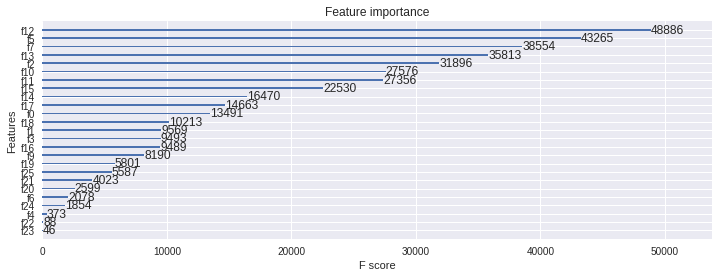

,feature,importance
12,offset_hours,12.537991
5,publisherId,11.096350
7,advertiserCampaignId,9.888101
13,hour,9.185104
2,Device,8.180496
10,dayofweek,7.072528
11,dayofyear,7.016104
15,subnet,5.778360
14,network,4.224128
17,region_code,3.760679


In [334]:
plot_importance(xgc,df_train,features)

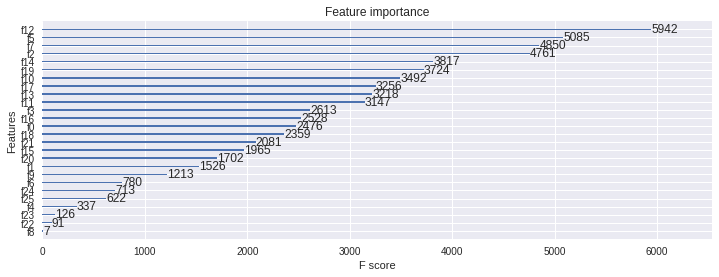

,feature,importance
12,offset_hours,9.517708
5,publisherId,8.144992
7,advertiserCampaignId,7.768577
2,Device,7.626019
14,network,6.113950
19,url,5.964985
10,dayofweek,5.593375
17,region_code,5.215358
13,hour,5.154490
11,dayofyear,5.040765


In [266]:
plot_importance(xgr,df_train,features)

### Predict for test set


In [633]:
gc.collect()
def predict_and_store(model,df_test,filename,output_column,output_convertor):
    X_t = df_test[features].values
    y_t=None
    if(output_convertor==None):
        print("No convertor given, using model directly")
        y_t = model(X_t)
    else:
        y_t = predict(model,X_t,output_convertor)
    ids =np.array(df_test["ID"]).astype(int)
#     my_solution = pd.DataFrame(y_t, ids, columns = [output_column])
    my_solution = pd.DataFrame({"ID":df_test["ID"],"ConversionPayOut":y_t})
#     my_solution[output_column] = my_solution[output_column].round(3)

    print(my_solution.shape)
#     my_solution.to_csv(filename, index_label = ["ID"])
    print(np.sum(my_solution["ConversionPayOut"]))
    my_solution.to_csv(filename,index=False,columns=["ID","ConversionPayOut"])

predict_and_store(xgb_and_lgbm_regression_predict,df_test,"results-model-1.csv",output_column,None)
# predict_and_store(xgc_regression_predict,df_test,"results-model-1.csv",output_column,None)
# predict_and_store(xgc_predict,df_test,"results-model-1.csv",features,output_column,binary_linear_conv)
# predict_and_store(combined_xgb_lgbm_predictor,df_test,"results-model-1.csv",features,output_column,binary_linear_conv)
# predict_and_store(xgc_predict,df_test,"results-model-1.csv",features,output_column,binary_conv)
# predict_and_store(combined_xgb_lgbm_predictor,df_test,"results-model-1.csv",features,output_column,binary_conv)
# predict_and_store(xgr.predict,df_test,"results-model-1.csv",features,output_column,capper)

132

No convertor given, using model directly
(25548873, 2)
2150.948630094528


### Snippets

In [ ]:
df_conv_filtered.head()

In [ ]:
import scipy
scipy.stats.pearsonr(df_conv_filtered['hour'],df_conv_filtered['offset_hours'])